In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from datetime import date

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Predicting Stock Price using a Trivial Model

This part will contain the trivial model where the model will predict the closing price at time, t, as the closing price of the previous day, t-1.


In [3]:
# Input ticker - Using META as example
meta_ticker = yf.Ticker("META")

# Getting historical data of META
meta_historical = meta_ticker.history(period='max')
meta_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-18 00:00:00-04:00,42.049999,45.000000,38.000000,38.230000,573576400,0,0
2012-05-21 00:00:00-04:00,36.529999,36.660000,33.000000,34.029999,168192700,0,0
2012-05-22 00:00:00-04:00,32.610001,33.590000,30.940001,31.000000,101786600,0,0
2012-05-23 00:00:00-04:00,31.370001,32.500000,31.360001,32.000000,73600000,0,0
2012-05-24 00:00:00-04:00,32.950001,33.209999,31.770000,33.029999,50237200,0,0
...,...,...,...,...,...,...,...
2022-10-20 00:00:00-04:00,132.929993,136.770004,131.309998,131.529999,26356300,0,0
2022-10-21 00:00:00-04:00,126.309998,130.119995,125.440002,130.009995,46195500,0,0
2022-10-24 00:00:00-04:00,127.250000,133.479996,124.570000,129.720001,63563400,0,0


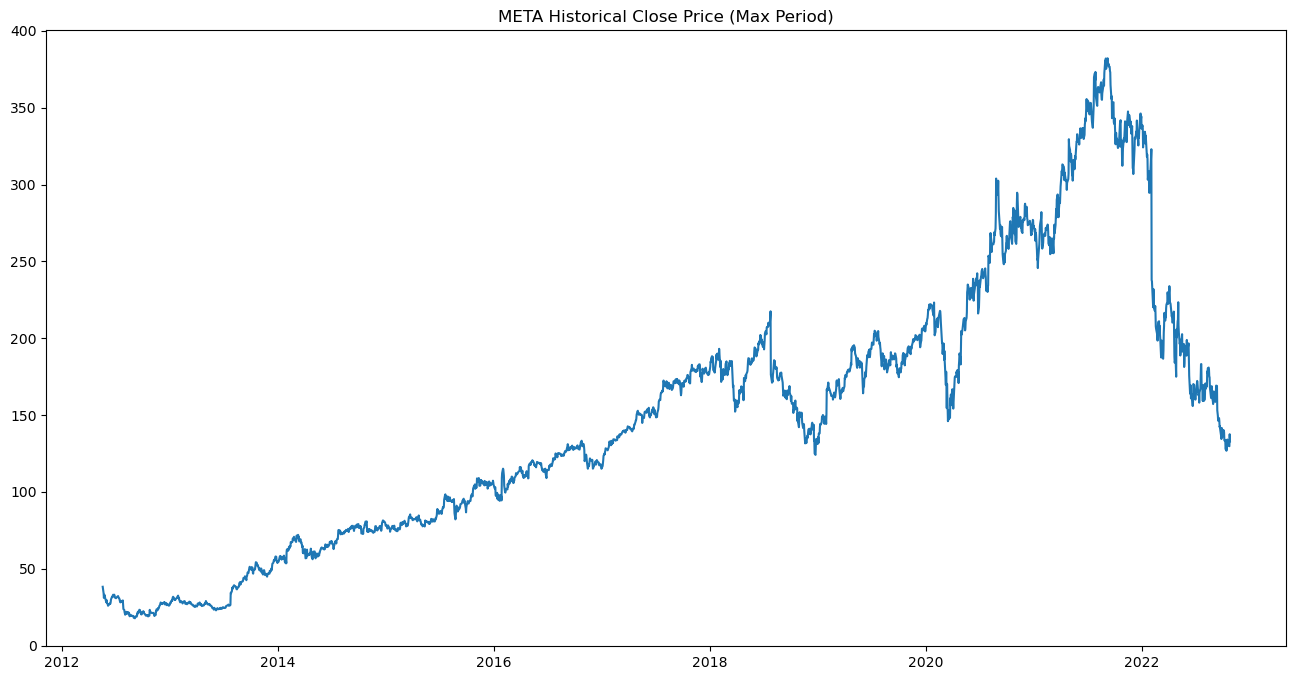

In [4]:
plt.figure(figsize=(16,8))
plt.plot(meta_historical.index, meta_historical["Close"], label='Close Price History')

plt.title('META Historical Close Price (Max Period)')
plt.show()

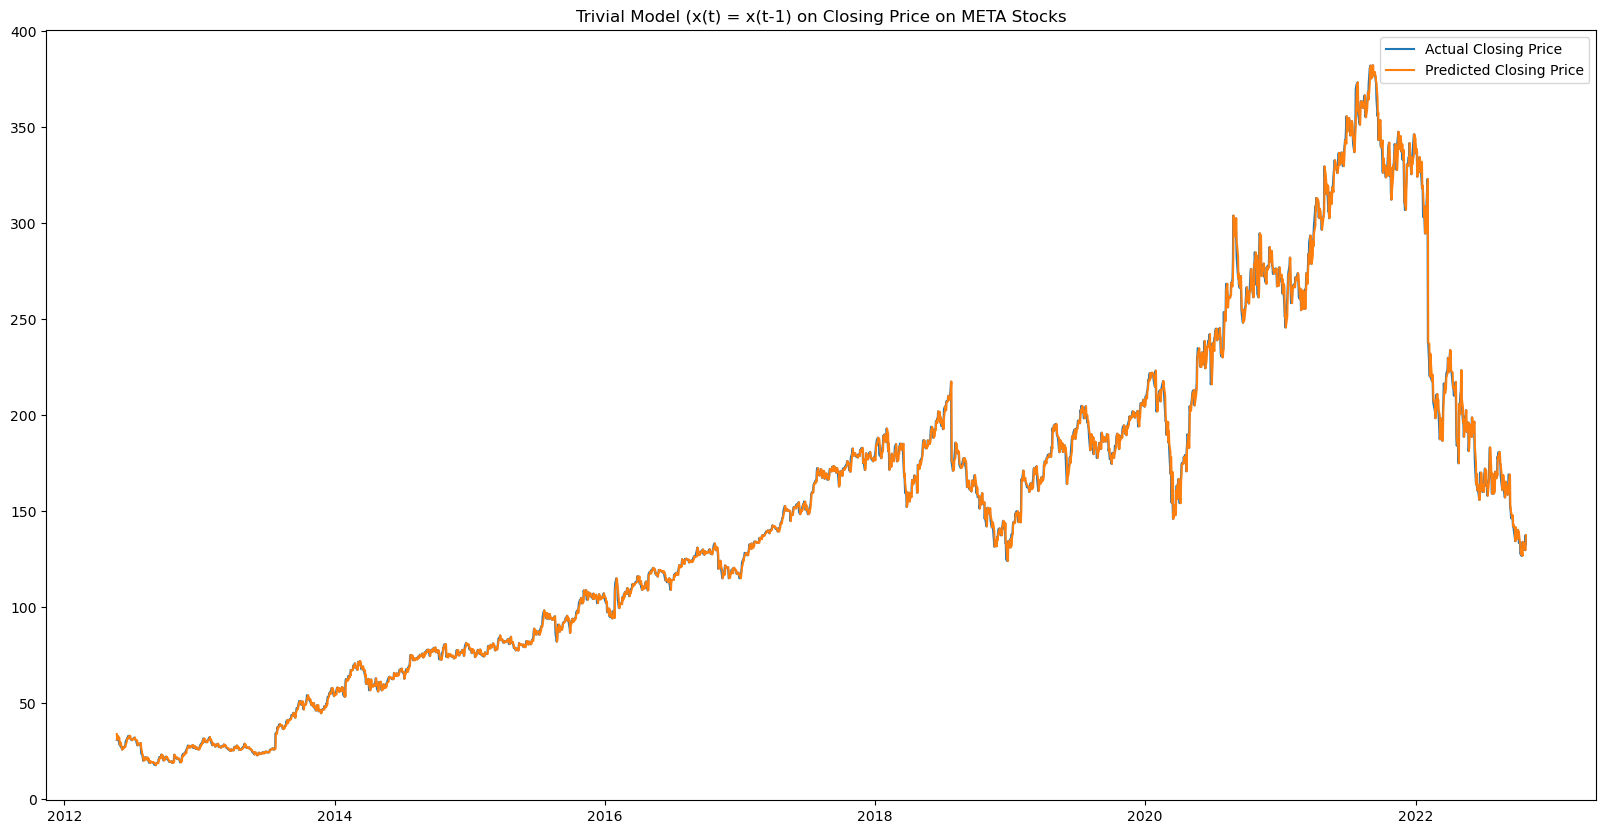

In [15]:
# Normalizing
meta_historical_close = meta_historical[['Close']]

# Trivial Model
trivial_model_predicted_outputs = meta_historical_close[:-1]
actual_outputs = meta_historical_close[1:]

plt.plot(meta_historical.index[1:], actual_outputs, label='Actual Closing Price')
plt.plot(meta_historical.index[1:], trivial_model_predicted_outputs, label='Predicted Closing Price')

plt.title("Trivial Model (x(t) = x(t-1) on Closing Price on META Stocks")
plt.legend()
plt.show()

In [6]:
print("R2 Score:" ,r2_score(actual_outputs, trivial_model_predicted_outputs))
print("Mean Squared Error:", mean_squared_error(actual_outputs, trivial_model_predicted_outputs))
print("Mean Absolute Error:", mean_absolute_error(actual_outputs, trivial_model_predicted_outputs))

R2 Score: 0.9977914579640386
Mean Squared Error: 16.936537344071755
Mean Absolute Error: 2.308816216406733


### Predicting Stock Returns using a Trivial Model

This part will contain the trivial model where the model will predict the stock returns at time, t, as the stock returns of the previous day, t-1.


In [7]:
def getReturns(closingPrices):
  return pd.concat([pd.Series(np.nan), closingPrices.diff().reset_index(drop=True)[1:].reset_index(drop=True).div(closingPrices[:-1].reset_index(drop=True))]).reset_index(drop=True)

meta_historical_returns = getReturns(meta_historical['Close'])
meta_historical_returns.index = meta_historical.index
meta_historical['Returns'] = meta_historical_returns
meta_historical = meta_historical[1:]


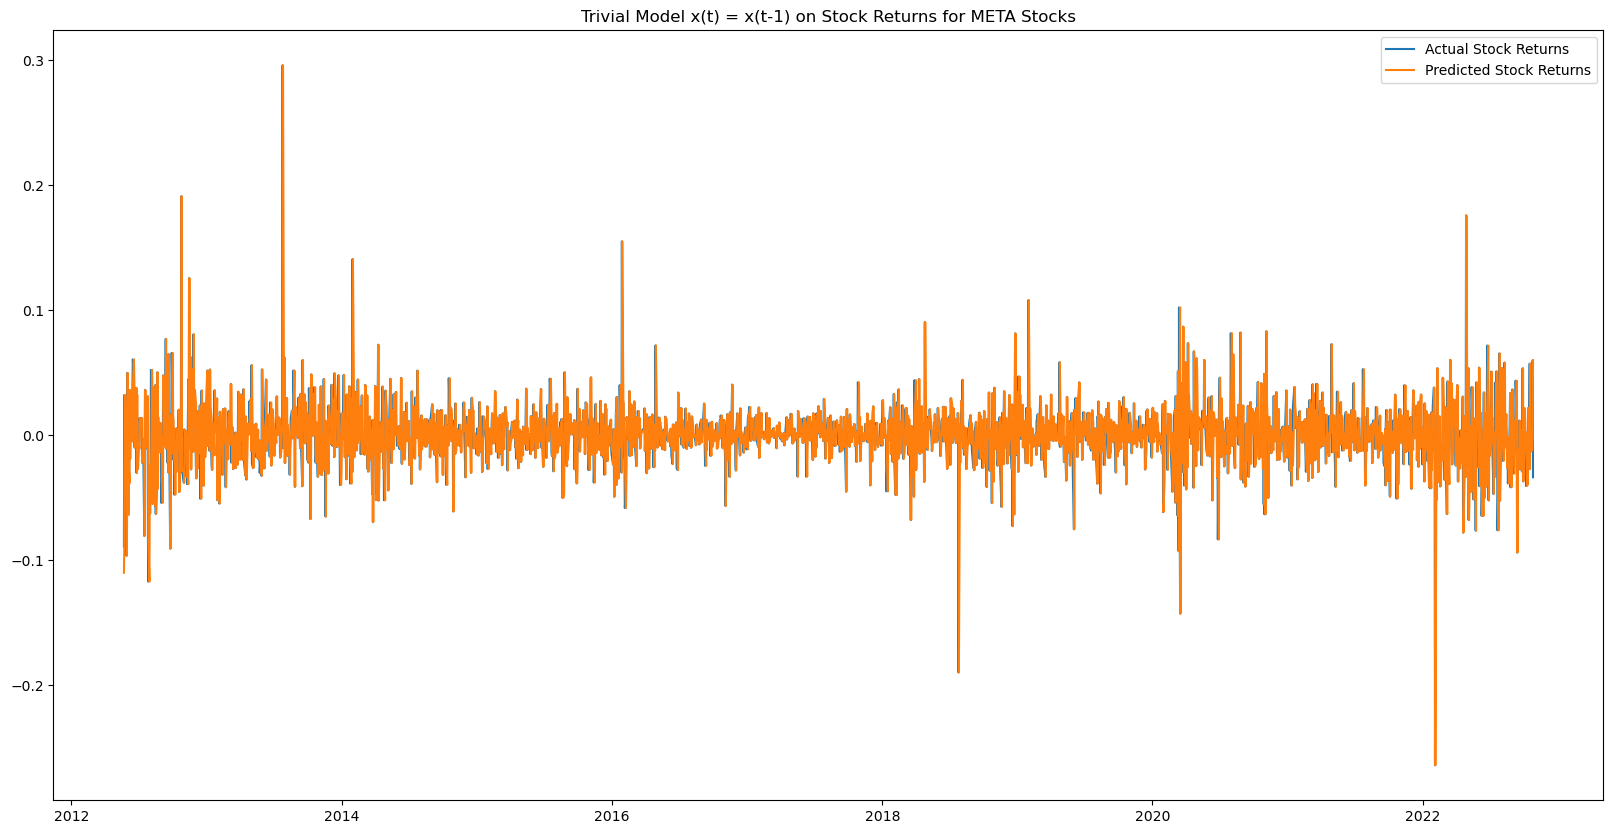

In [12]:
meta_historical_returns_prediction = meta_historical_returns[1:-1]
meta_actual_returns = meta_historical_returns[2:]

plt.plot(meta_historical_returns.index[2:], meta_actual_returns, label='Actual Stock Returns')
plt.plot(meta_historical_returns.index[2:], meta_historical_returns_prediction, label='Predicted Stock Returns')
plt.title("Trivial Model x(t) = x(t-1) on Stock Returns for META Stocks")
plt.legend()
plt.show()

In [14]:
print("R2 Score:" ,r2_score(meta_actual_returns, meta_historical_returns_prediction))
print("Mean Squared Error:", mean_squared_error(meta_actual_returns, meta_historical_returns_prediction))
print("Mean Absolute Error:", mean_absolute_error(meta_actual_returns, meta_historical_returns_prediction))

R2 Score: -1.0770668884693713
Mean Squared Error: 0.001250115547748766
Mean Absolute Error: 0.024113537223418417
